<a href="https://colab.research.google.com/github/derekbomfimprates/Regression-Classification/blob/main/CA_B9DA109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Electronic Assignment Cover sheet**


Please fill out and attach asthe first page of Assignment.

**Student (s) Number as per your student card**:
1. 20023080 - Derek Bomfim Prates


**Course Title**: Master of Science in Data Analytics

**Lecturer Name**: Satya Prakash

**Module/Subject Title**: Machine Learning and Pattern Recognition

**Assignment Title:** Supervised Machine Learning – (Regression/Classification)

1. Research and choose a suitable dataset and apply any three regression or classification methods in Python.


  The dataset selected was the "Adult" dataset from the UCI Machine Learning Repository. This dataset contains demographic information about adults, and the goal is to predict whether a person earns more than $50,000 per year or not, classification task.


2. Your dataset must have minimum 15 variables (including dependent and independent variables).


  **Number of Variables**: 15 variables, including both categorical and numerical features.

  **Target Variables**: As the Target variable is Income (Values is categorical) it is called **class label**.
  
  **Classification Target**: Income class (binary: <=50K or >50K).

  The variables include information such as:
  
*  age - type int64 - **Independent Variable**

*  workclass - type object - **Independent Variable**

*  fnlwgt - type int64 - **Independent Variable**

*  education - type object - **Independent Variable**

*  educational-num - type int64 - **Independent Variable**

*  marital-status - type object - **Independent Variable**

*  occupation - type object - **Independent Variable**

*  relationship - type object - **Independent Variable**

*  race - type object - **Independent Variable**

*  gender - type object - **Independent Variable**

*  capital-gain - type int64 - **Independent Variable**

*  capital-loss - type int64 - **Independent Variable**

*  hours-per-week - type int64 - **Independent Variable**

*  native-country - type object - **Independent Variable**

*  income - type object - **Dependent Variable**



3. You should provide a reference of the source of dataset.


  The data set can be found on: https://archive.ics.uci.edu/dataset/2/adult


4. Identify what problem are you trying to solve using machine learning.


  Classification task


5. Choose dependent and independent variables and apply the algorithms.



  Dependent variables is income and the other 14 variables are independents




# Import Section

To simplify and ensure easy access to all imports, this section will be dedicated to importing all necessary packages at the beginning of the project.

In [ ]:
#!pip install imbalanced-learn


In [ ]:
import matplotlib.pyplot as plt                      # For plotting data
import seaborn as sns                                # For plotting data
import pandas as pd                                  # For dataframes
import numpy as np                                   # For IQR method
from sklearn import linear_model                     # For Linear model analises
from sklearn.preprocessing import LabelEncoder       # For label Enconder Variables
from sklearn.model_selection import train_test_split # For training and testing the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats                              # For statistic analisys
from scipy.stats import mstats                       # For statistic analises
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler


# Data Loading

As the dataset contains a large number of inputs, it was decided to mount the drive to ensure the full dataset will be updated.

In [ ]:
# mounting to google driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Using Pandas to read a CSV (Comma-Separated Values) file and store its contents in a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/adult.csv')

It is a good practice to check the first 5 entries in a dataset and the last 5 entries to ensure it was read correctly.

In [ ]:
# Displaying the first five lines of the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Displaying the last five lines of the dataset
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Using the **info()** method provides additional information about the data we are using. For example, it shows the number of inputs, if there is any null values, variable naming, and variable types.

Some datasets are manually created, and typos can occur, such as extra spaces or non-standardized capitalization. To ensure the analyses are done correctly, it is important to check for these issues before conducting the analyses.

In [ ]:
# Checking the variables information/details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Data Preprocessing

Before conducting any analyses, it is a good practice to check and preprocess the data to ensure it has the correct form. This involves addressing any missing values, typos, or deviations from standard format, which could impact the analyses.

In [ ]:
# Checking the number of line in the dataset
num_lines = df.shape[0]

print(f'The dataset has {num_lines} entries.')

The dataset has 48842 entries.


The first step is to check for duplicate data or 'NaN' values in the dataset. A treatment strategy will be applied based on the percentage of this data relative to the entire dataset (delete, impute, etc.).

In this dataset, only 52 inputs (0.1065% of 48,790) are duplicates, and there are no NaN values. As a result, we decided to delete them since they will not have a major impact on the analysis.

**Addressing Duplicated Values**

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

52

In [ ]:
# Deleting the Duplicate values
df= df.drop_duplicates()

In [ ]:
# Checking again if the duplicate values were deleted
df.duplicated().sum()

0

**Addressing NaN values**

In [ ]:
#checking for NaN values
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**Data Treatment**

In [ ]:
# Checking the type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [ ]:
df.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# recording the numeric features
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

**Standard variable types**

It is possible to observe two types of variables: 'Object' and 'int64'. To conduct analyses accurately, all variables should be of the same type. Therefore, we are going to convert the variables of type 'Object' to 'int64'.

In [ ]:
# The method chose to transform the variable is LabelEncoder.  It is used for converting categorical data,
# represented as strings or integers, into numerical labels.

# Creating an instance 'le' of LabelEncoder.
le = LabelEncoder()

In [ ]:
# Creating a list with the variables that will be converted into numerical.
ls = ['workclass','education','marital-status','occupation','relationship','race', 'gender', 'native-country', 'income']

# Performing the converting on all itens in the list
for col in ls:
  df[col] = le.fit_transform(df[col])

# Checking the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48790 non-null  int64
 1   workclass        48790 non-null  int64
 2   fnlwgt           48790 non-null  int64
 3   education        48790 non-null  int64
 4   educational-num  48790 non-null  int64
 5   marital-status   48790 non-null  int64
 6   occupation       48790 non-null  int64
 7   relationship     48790 non-null  int64
 8   race             48790 non-null  int64
 9   gender           48790 non-null  int64
 10  capital-gain     48790 non-null  int64
 11  capital-loss     48790 non-null  int64
 12  hours-per-week   48790 non-null  int64
 13  native-country   48790 non-null  int64
 14  income           48790 non-null  int64
dtypes: int64(15)
memory usage: 6.0 MB


# Exploratory Data Analysis (EDA)

Conduct EDA to understand the distributions of various features and the target variable, check for outliers, and see how the features relate to the target variable.

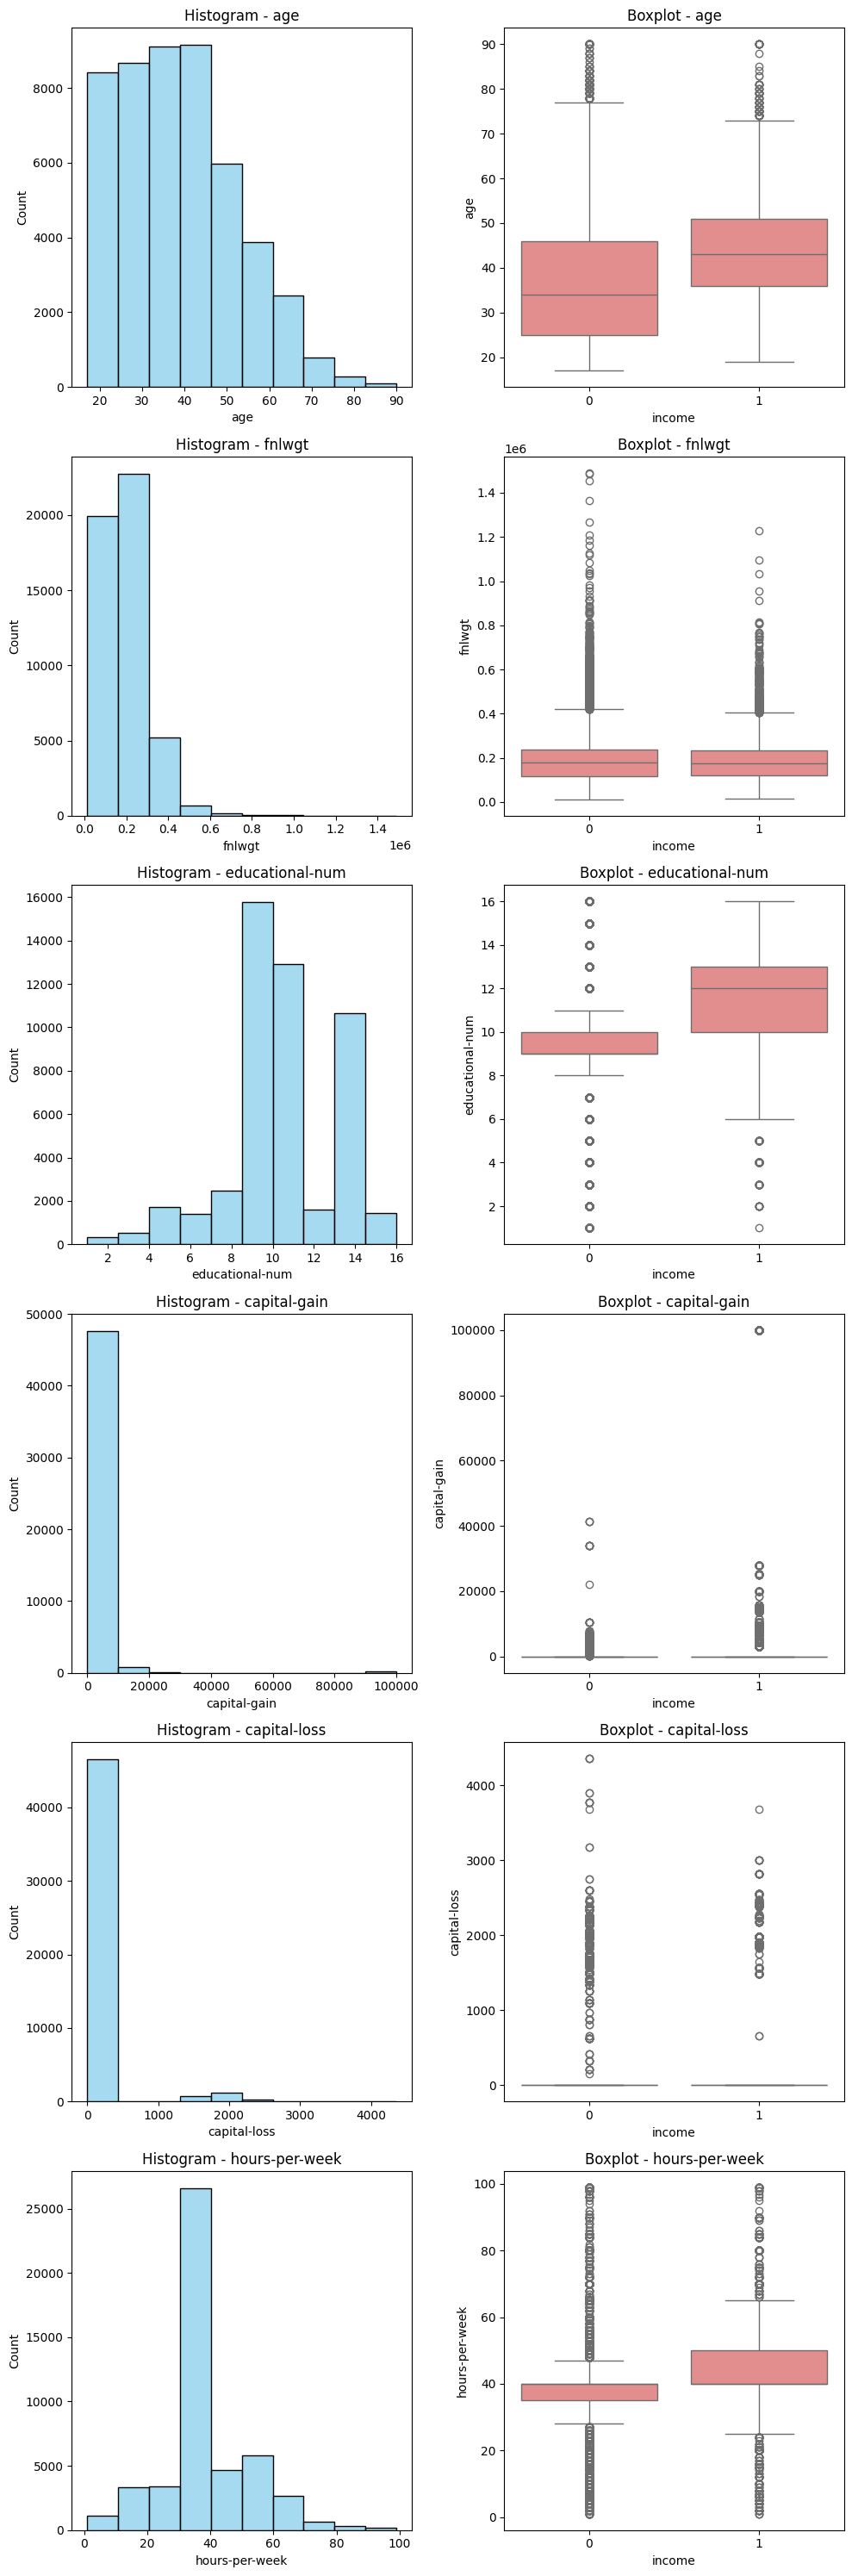

In [ ]:
# Plotting

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(10, 2 * len(df.columns)))

# Iterate through each column and plot histogram and boxplot
for i, column in enumerate(numeric_columns):
    # Plot histogram
  sns.histplot(df[column], bins=10, kde=False, color='skyblue',ax=axes[i, 0])
  axes[i, 0].set_title(f'Histogram - {column}')

  # Plot boxplot
  sns.boxplot(x=df['income'], y=column, data=df, ax=axes[i, 1], color='lightcoral')
  axes[i, 1].set_title(f'Boxplot - {column}')

  # Adjust layout
plt.tight_layout()
plt.show()


**Split the Dataset**

We deceided to split the dataset into training and testing sets before applying any preprocessing steps. This ensures that the test set is completely unseen during the preprocessing phase, preventing any data leakage from the test set into the training set.

# Splitting the data into training and test sets



The process of split a data it is very important as it has impact over the analyses.The specific percentages can different based on the size of the dataset and the nature of the problem.

For this analysis, we decided to use the '80-20 rule' for splitting data into training and testing sets. The decision was based on the following observation:

First, the dataset is large (48,790 entries). As a hyperparameter analysis will be performed, a smaller testing set can lead to faster model evaluation.

It is possible to split the data using the "70-30 rule" in case there is limited data and complex models.

In [ ]:
# X represents the independent variables, and y represents the dependent variable.
X = df.drop(columns='income')
y = df['income']

As it is a machine learning analysis, the random_state was set to a specific integer (random_state=42). This way, every time the code is run with the same random seed, it will get the same split, which is important for the reproducibility of the experiment.

The default option will use the current system time or other sources of randomness, resulting in a different split each time you run the code.

In [ ]:
# Split: test dataset 20% of the dataset and the training dataset is 80% of the dataset
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
# Print the shape of X (full dataset), the shape of X_train (training dataset), and the shape of X_test (test dataset).
print(X.shape)
print(X_train.shape)
print(X_test.shape)

In [ ]:
#Save df, trn, and tst to CSV files to be used later.
df.to_csv('adult-raw.csv', sep=',', index=False)
X_train.to_csv('adult_trn.csv', sep=',' ,index=False)
X_test.to_csv('adult_tst.csv', sep=',' ,index=False)

**Dataset Size:** If your dataset is small, you might prefer balancing before splitting to ensure that both sets have a good representation of classes. In larger datasets, balancing after splitting might be a more reasonable choice.

**Imbalance Severity:**The severity of class imbalance in your dataset plays a role. If the imbalance is extreme, balancing before splitting may be more critical.

**Stratified Sampling:** In both cases, consider using stratified sampling to ensure that the class distribution is maintained in both the training and testing sets.

In [ ]:
 sns.histplot(y_train, bins=10, kde=False, color='skyblue')

In [ ]:
 sns.histplot(y_test, bins=10, kde=False, color='skyblue')

In [ ]:
print(y_train.value_counts())
sm = SMOTE()

X_train, y_train= sm.fit_resample(X_train, y_train)
print(y_train.value_counts())

# **Standardization of Features**

As the dataset has features with different magnitudes, it was decided to standardize the features to avoid numerical Instabilities preventing numerical instability issues that can arise in certain algorithms, make it easier to interpret model coefficients or weights, make models more robust to outliers, and algorithms that rely on optimization techniques converge faster when features are standardized


In [ ]:
df.describe()

In [ ]:
#Standard Scaler
std_std = StandardScaler()
X_std = std_std.fit_transform(X)

#Min and Max Scaler
std_minmax = MinMaxScaler()
X_minmmax = std_minmax.fit_transform(X)

# The np.log1p function is often preferred over np.log to handle cases where the data contains zeros.
X_log = np.log1p(X)

In [ ]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size = 0.2, random_state = 42)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X_minmmax, y, test_size = 0.2, random_state = 42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size = 0.2, random_state = 42)

# **Outlier Detection**

Outliers may have a significant impact on the performance of a classification model. Extreme values can influence the estimation of model parameters and may lead to suboptimal results.

In [ ]:
df.describe()

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [ ]:
# Calculate z-scores for numerical features

z_scores = pd.DatacoreFrame()
for feature in numeric_columns:
  z_scores[feature] = stats.zscore(df[feature])
  print(z_scores.abs())


# Identify and filter out rows with z-scores beyond a certain threshold (e.g., 3)
outliers = (z_scores.abs() > 3).any(axis=1)

df = df[~outliers]



In [ ]:
df.describe()

In [ ]:
# Handling Outliers

# Visualize outliers using boxplots

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


#  Logistic Regression, Gaussian Naive Baye, and Support Vector Machine

In this section, functions will be created to perform **training** and **testing** for each method.

For the analyses of machine learning models, it will defined a hyperparameter grids as a dictionary '**param**'. This way, an instance of **GridSearchCV** will be created and check the best set of paramets.  . We are using **verbose**=2 to obtain additional details for each evaluation, including the parameter settings.

The verbose parameter controls the amount of messages the method prints out to the console during its execution. It's a way to monitor the progress of the grid search, especially when searching through a large hyperparameter space or dealing with a large dataset, which can be time-consuming.

*   **verbose=0**: No output (Default).
*  **verbose=1:** Indicates the number of completed folds for each point in the parameter grid.
*   **verbose=2:** Outputs additional details for each evaluation, including the parameter setting.
*   **verbose=3** or higher: Some libraries might support even higher verbosity levels, which could lead to even more detailed messages.


It was decided to print the confusion matrix to analyze the performance of each test, as well as the **Receiver Operating Characteristic** (**ROC**) Curve and the calculation of its area.




In [ ]:
def Classification(ClassificationTask,X_train, X_test, y_train, y_test):



  # Check the Classification task performed
  if ClassificationTask == LogisticRegression:

    # Creating a dictionary with the parameters that we want to try
    param = {'penalty': ['l1', 'l2'], # penalty L1 or L2
             'C': [0.1, 1, 10, 100] } # Regularization strength

    # Using the GridSearchCv to perform the anlyses for each parameter
    grid = GridSearchCV(ClassificationTask(), param_grid = param, verbose = 2)

  elif ClassificationTask == GaussianNB:

    # Creating a dictionary with the parameters that we want to try
    param = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

    grid = GridSearchCV(ClassificationTask(), param_grid = param, verbose = 2)

  else:
    param = {'C': [10, 100]}
    #param = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

    # For Support Vector machine we need to pass probability=True to calcule the probabilities.
    grid = GridSearchCV(ClassificationTask(probability=True), param_grid = param, verbose = 2)


  # Fitting the model using .fit()
  grid.fit(X_train, y_train)

  # Printing the best parameters and score
  print("The best parameters are: ", grid.best_params_)
  print("The best score associeted with the best parameters are: ", grid.best_score_)

  # Selecting the best model
  best_model = grid.best_estimator_

  # Predicting using the best model
  y_pred = best_model.predict(X_test)

  # Creating the confusion Matrix using the test and predric data
  confusion_LR = confusion_matrix(y_test, y_pred)

  # Predict probabilities
  y_probs = best_model.predict_proba(X_test)

  # Keep probabilities for the positive outcome only
  y_probs = y_probs[:, 1]

  # Compute the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_probs)

  # Compute the AUC
  auc = roc_auc_score(y_test, y_probs)
  print(f'The value of the area of the ROC curve (AUC) is : {auc:.2f}')

  #Ploting the results for the ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc)
  plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

  #print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  # sequential Sequential: appropriate when data ranges from relatively low
  # (uninteresting values) to relatively high (interesting values).
  plt.figure(figsize=(6,6))
  sns.heatmap(confusion_LR,
              annot=True,
              cmap = 'Blues',
              fmt=".1%");
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');


# Optimising Analyses

1. Feature Selection: Choose relevant features. Picked this one due to it having the best results. Done
2. Data Preprocessing: Handle missing values and outliers.Done
3. Regularization: Use L1 or L2 regularization to prevent overfitting. Done
4. Hyperparameter Tuning: Optimize parameters like learning rate. Done
5. Cross-Validation: Validate on separate data.
6. Imbalanced Data: Address class imbalance with techniques like SMOTE. Done

# Logistic Regression Analysis

As the data is imbalanced we will use the macro avg. instead of the accuracy.



In [ ]:
Classification(LogisticRegression,X_train, X_test, y_train, y_test)

In [ ]:
Classification(LogisticRegression,X_train_std, X_test_std, y_train_std, y_test_std)

In [ ]:
Classification(LogisticRegression,X_train_log, X_test_log, y_train_log, y_test_log)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.3s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.4s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.3s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.4s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.4s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

The best parameters are:  {'C': 100, 'penalty': 'l2'}
The best score associeted with the best parameters are:  0.8248360910134027
The value of the area of the ROC curve (AUC) is : 0.85


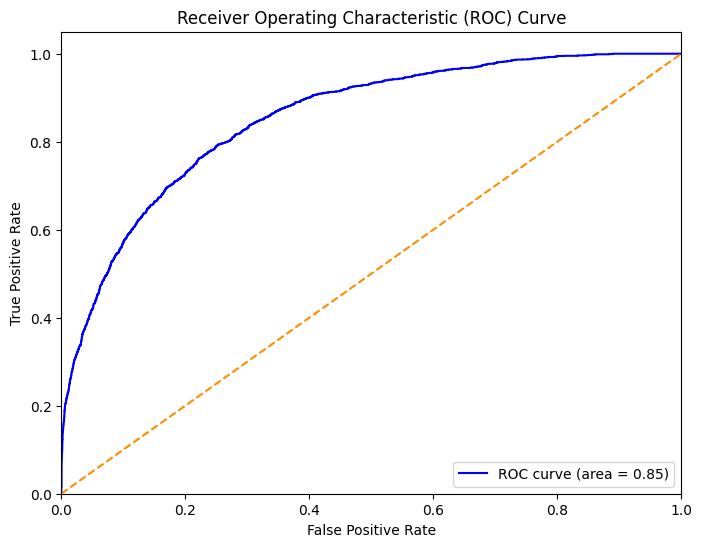

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7440
           1       0.71      0.44      0.55      2318

    accuracy                           0.82      9758
   macro avg       0.78      0.69      0.72      9758
weighted avg       0.81      0.82      0.81      9758



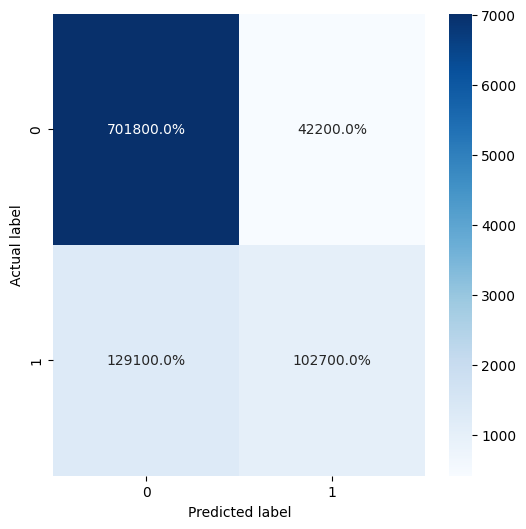

In [ ]:
Classification(LogisticRegression,X_train_mm, X_test_mm, y_train_mm, y_test_mm)

In [ ]:
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.020740,-0.075509,-0.010980,0.038602,-0.282708,-0.009104,-0.265054,0.026962,0.085077,0.128287,0.018100,0.091742,-0.001574,0.235827
workclass,0.020740,1.000000,-0.016654,0.015428,0.052751,-0.064343,0.254819,-0.092209,0.051656,0.088991,0.025216,0.001689,0.129137,-0.006691,0.043283
fnlwgt,-0.075509,-0.016654,1.000000,-0.016684,-0.034493,0.029507,-0.001767,0.006976,-0.013552,0.030645,-0.000518,-0.001715,-0.010560,-0.048115,-0.003408
education,-0.010980,0.015428,-0.016684,1.000000,0.351631,-0.035555,-0.023954,-0.012018,0.014658,-0.028541,0.027875,-0.002426,0.060372,0.053659,0.072401
educational-num,0.038602,0.052751,-0.034493,0.351631,1.000000,-0.062256,0.108590,-0.094155,0.023864,0.007146,0.152602,0.008829,0.149493,0.023571,0.316558
marital-status,-0.282708,-0.064343,0.029507,-0.035555,-0.062256,1.000000,-0.015232,0.187681,-0.068606,-0.122398,-0.067254,-0.016084,-0.189788,-0.018389,-0.194717
occupation,-0.009104,0.254819,-0.001767,-0.023954,0.108590,-0.015232,1.000000,-0.075590,0.007747,0.075129,0.026253,0.002023,0.069245,-0.012961,0.070122
relationship,-0.265054,-0.092209,0.006976,-0.012018,-0.094155,0.187681,-0.075590,1.000000,-0.117438,-0.575482,-0.090341,0.025040,-0.258949,-0.005089,-0.250563
race,0.026962,0.051656,-0.013552,0.014658,0.023864,-0.068606,0.007747,-0.117438,1.000000,0.088217,0.025015,-0.001323,0.041508,0.135768,0.069412
gender,0.085077,0.088991,0.030645,-0.028541,0.007146,-0.122398,0.075129,-0.575482,0.088217,1.000000,0.071144,-0.020319,0.233893,-0.009471,0.210499


In logistic regression analysis, the choice of variables to be included in the model is crucial to ensure an effective and interpretable model. When considering the absolute values of expectation with the target variable 'yield', you may want to choose variables that have a more substantial shine, but you should also consider other factors.

Based on the values presented:

Variables with Strongest Correlations:

'on one. educational' (0.332802), 'relationship' (0.253175), 'age' (0.230144), 'gender' (0.214639), 'hours per week' (0.227664), and 'earnings capital' (0.223047) have relatively stronger correlations with 'income'. These variables can be considered for inclusion in the model.
Avoid Collinearity:

In addition to transparency with ‘income’, it is important to consider the collinearity between the independent variables. If two variables are highly correlated with each other, it may be redundant to include them together in the model.
Contextual Considerations:

Consider problem context and domain knowledge when choosing variables. Some variables may have theoretical or practical importance, regardless of their gloss with 'income'.

In [ ]:
cor = df.corr()

abs(cor['income'])

age                0.235827
workclass          0.043283
fnlwgt             0.003408
education          0.072401
educational-num    0.316558
marital-status     0.194717
occupation         0.070122
relationship       0.250563
race               0.069412
gender             0.210499
capital-gain       0.339905
capital-loss       0.016553
hours-per-week     0.229660
native-country     0.008025
income             1.000000
Name: income, dtype: float64

In [ ]:
cor_1 = cor[abs(cor['income'])>0.05]

cor_2 = cor[abs(cor['income'])>0.1]

cor_3 = cor[abs(cor['income'])>0.2]

cor_4 = cor[abs(cor['income'])>0.3]

In [ ]:
ls_feat1 = list(cor_1['income'].index)

ls_feat2 = list(cor_2['income'].index)

ls_feat3 = list(cor_3['income'].index)

ls_feat4 = list(cor_4['income'].index)

In [ ]:
df_1 = df[ls_feat1]

df_2 = df[ls_feat2]

df_3 = df[ls_feat3]

df_4 = df[ls_feat4]

print(df.shape)
print(f"{df_1.shape} for income > 0.05")
print(f"{df_2.shape} for income > 0.1")
print(f"{df_3.shape} for income > 0.2")
print(f"{df_4.shape} for income > 0.3")

(44670, 15)
(44670, 11) for income > 0.05
(44670, 8) for income > 0.1
(44670, 7) for income > 0.2
(44670, 3) for income > 0.3


In [ ]:
X1 = df_1.drop(columns='income')
y1 = df_1['income']

X2 = df_2.drop(columns='income')
y2 = df_2['income']

X3 = df_3.drop(columns='income')
y3 = df_3['income']

X4 = df_4.drop(columns='income')
y4 = df_4['income']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 42)

In [ ]:
Classification(LogisticRegression,X_train1, X_test1, y_train1, y_test1)

In [ ]:
Classification(LogisticRegression,X_train2, X_test2, y_train2, y_test2)

In [ ]:
Classification(LogisticRegression,X_train3, X_test3, y_train3, y_test3)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

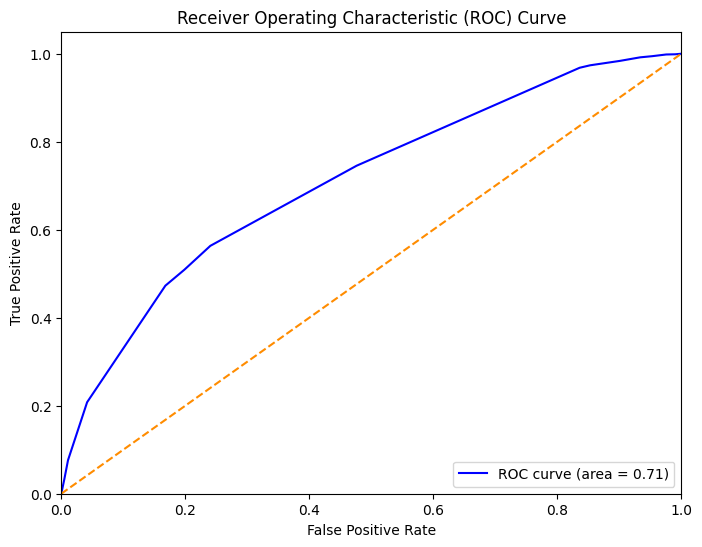

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      7440
           1       0.61      0.21      0.31      2318

    accuracy                           0.78      9758
   macro avg       0.70      0.58      0.59      9758
weighted avg       0.75      0.78      0.74      9758



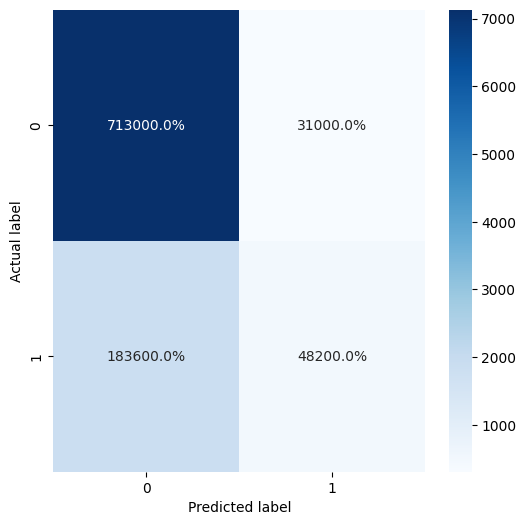

In [ ]:
Classification(LogisticRegression,X_train4, X_test4, y_train4, y_test4) # the best results were found using "income > 0.15"

# Gaussian Naive Baye Analysis

As the data is imbalanced we will use the macro avg. instead of the accuracy.



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

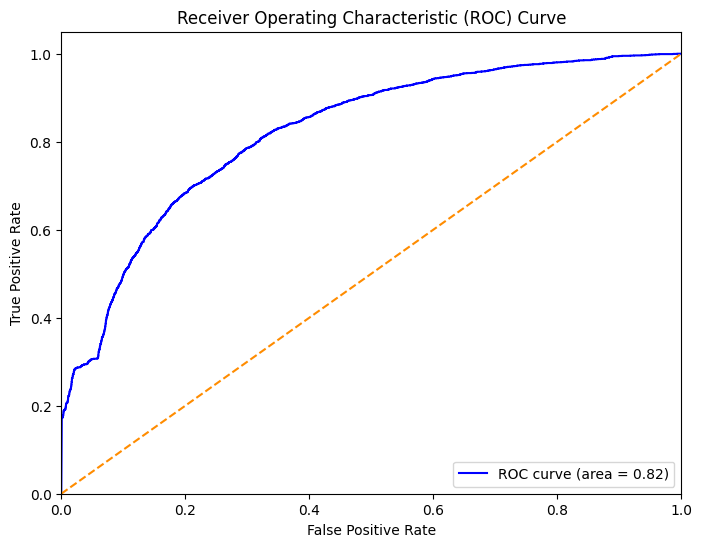

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7440
           1       0.63      0.31      0.41      2318

    accuracy                           0.79      9758
   macro avg       0.72      0.63      0.64      9758
weighted avg       0.77      0.79      0.77      9758



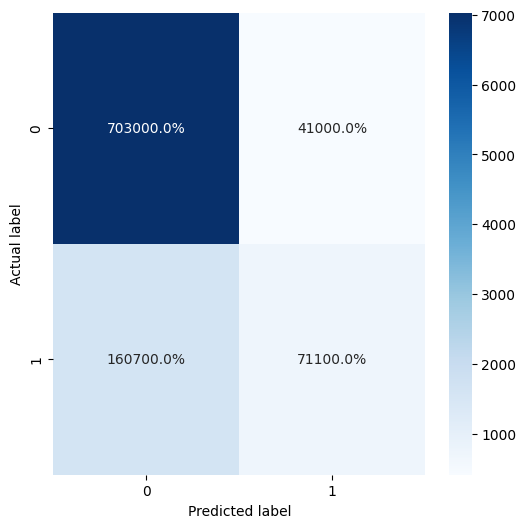

In [ ]:
Classification(GaussianNB,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

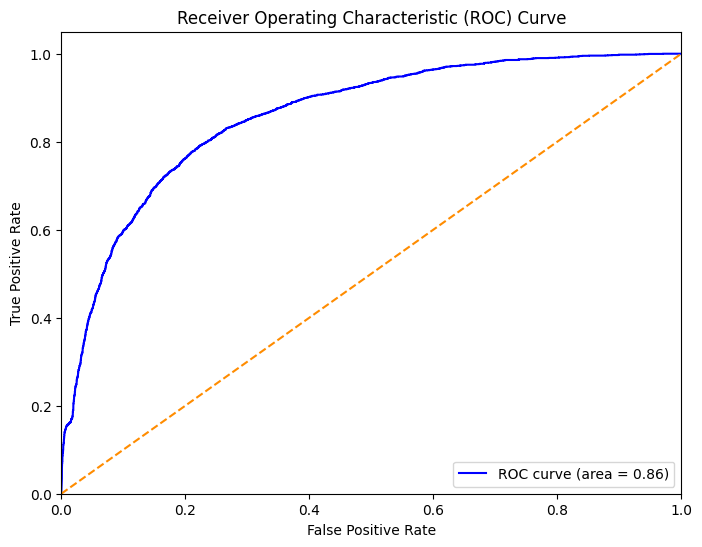

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7440
           1       0.74      0.36      0.49      2318

    accuracy                           0.82      9758
   macro avg       0.79      0.66      0.69      9758
weighted avg       0.81      0.82      0.79      9758



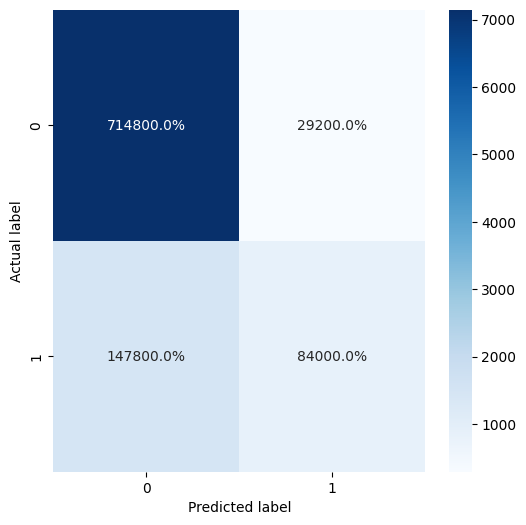

In [ ]:
Classification(GaussianNB,X_train_std, X_test_std, y_train_std, y_test_std)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

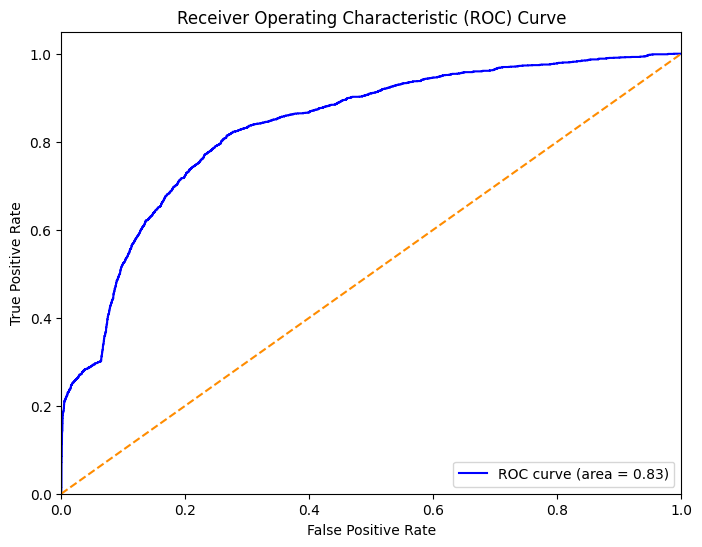

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7440
           1       0.55      0.68      0.61      2318

    accuracy                           0.79      9758
   macro avg       0.72      0.75      0.73      9758
weighted avg       0.81      0.79      0.80      9758



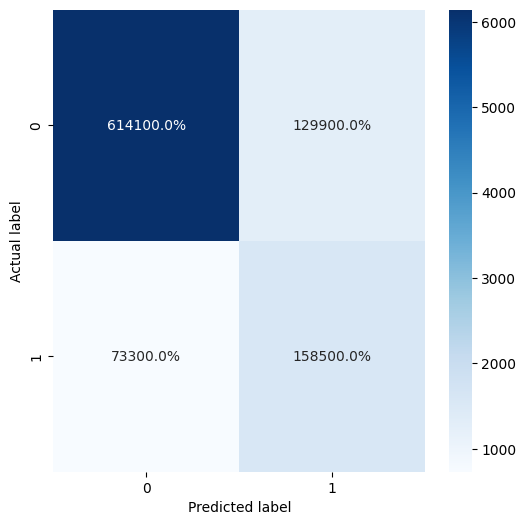

In [ ]:
Classification(GaussianNB,X_train_log, X_test_log, y_train_log, y_test_log)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

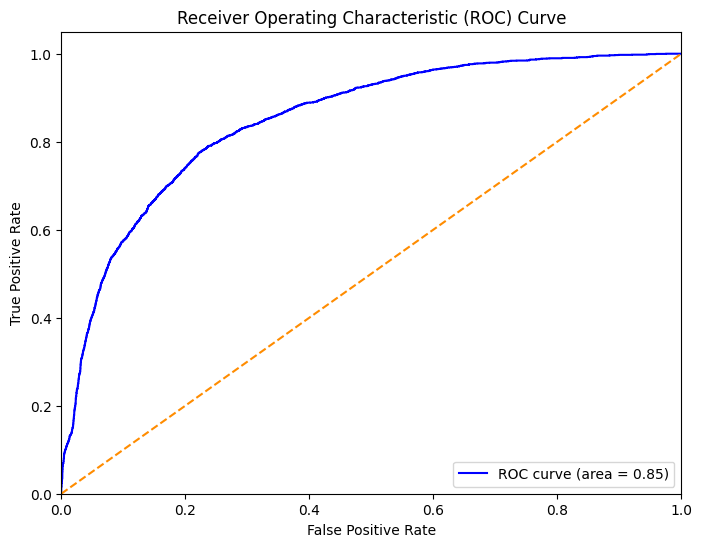

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7440
           1       0.71      0.45      0.55      2318

    accuracy                           0.82      9758
   macro avg       0.78      0.69      0.72      9758
weighted avg       0.81      0.82      0.81      9758



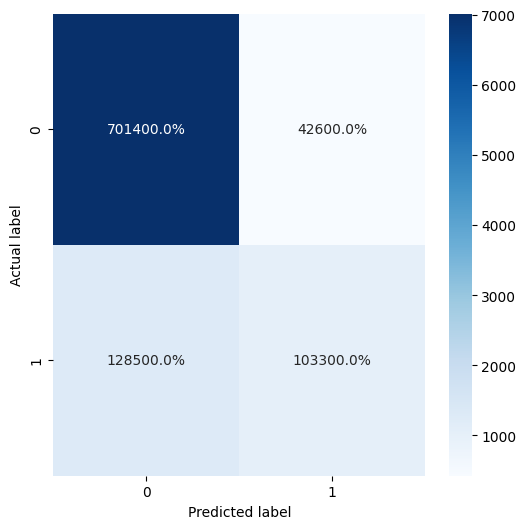

In [ ]:
Classification(GaussianNB,X_train_mm, X_test_mm, y_train_mm, y_test_mm)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

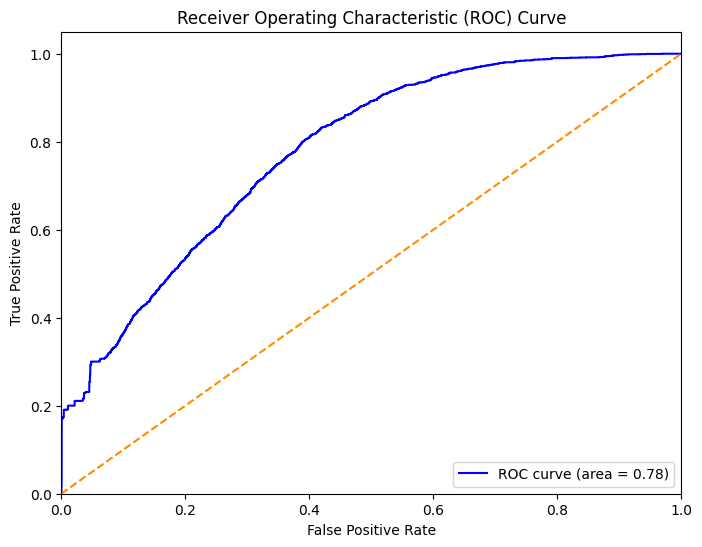

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7440
           1       0.95      0.17      0.29      2318

    accuracy                           0.80      9758
   macro avg       0.87      0.58      0.59      9758
weighted avg       0.83      0.80      0.74      9758



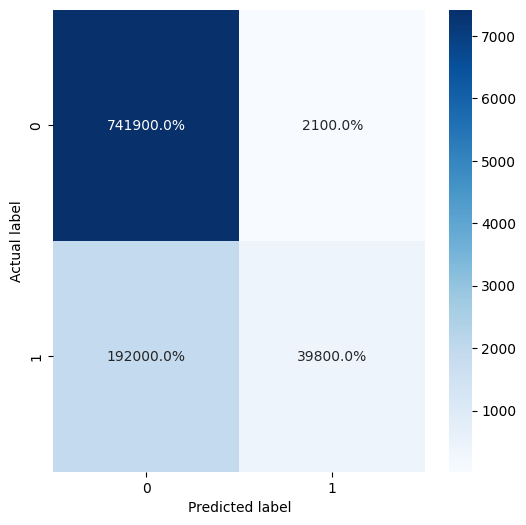

In [ ]:
Classification(GaussianNB,X_train1, X_test1, y_train1, y_test1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

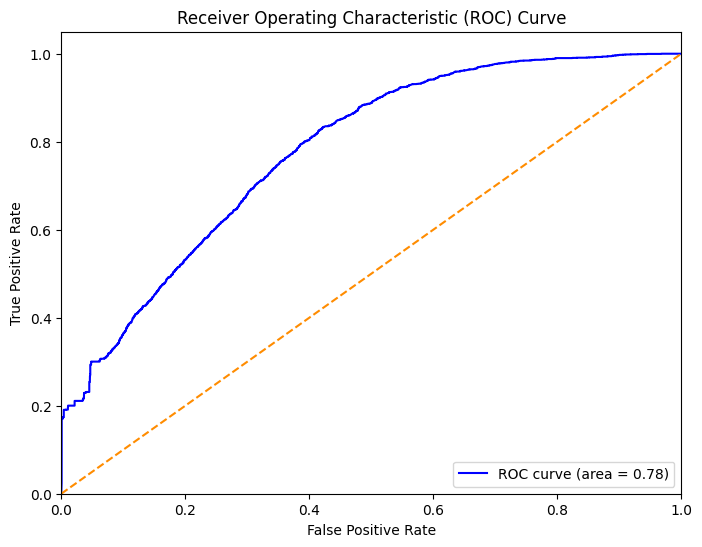

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7440
           1       0.95      0.17      0.29      2318

    accuracy                           0.80      9758
   macro avg       0.87      0.58      0.59      9758
weighted avg       0.83      0.80      0.74      9758



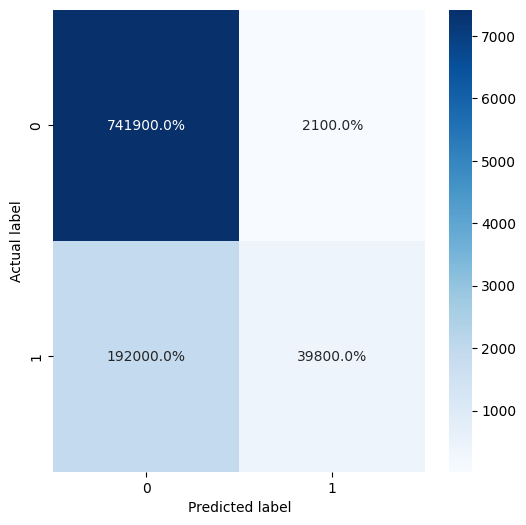

In [ ]:
Classification(GaussianNB,X_train2, X_test2, y_train2, y_test2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

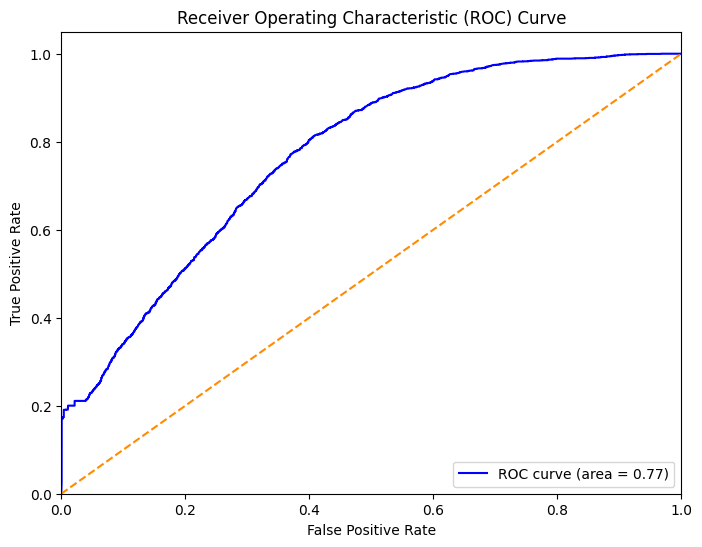

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7440
           1       0.95      0.17      0.29      2318

    accuracy                           0.80      9758
   macro avg       0.87      0.59      0.59      9758
weighted avg       0.83      0.80      0.74      9758



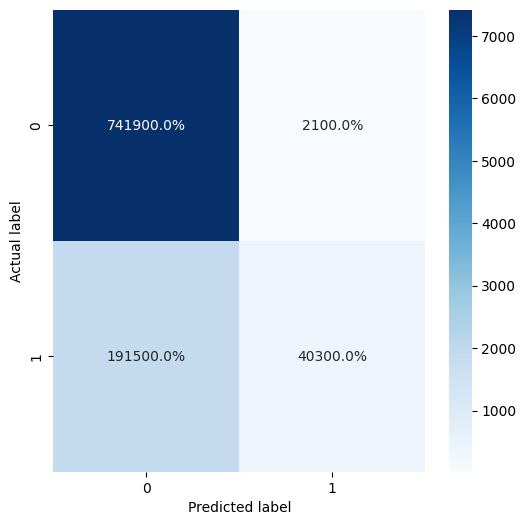

In [ ]:
Classification(GaussianNB,X_train3, X_test3, y_train3, y_test3)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

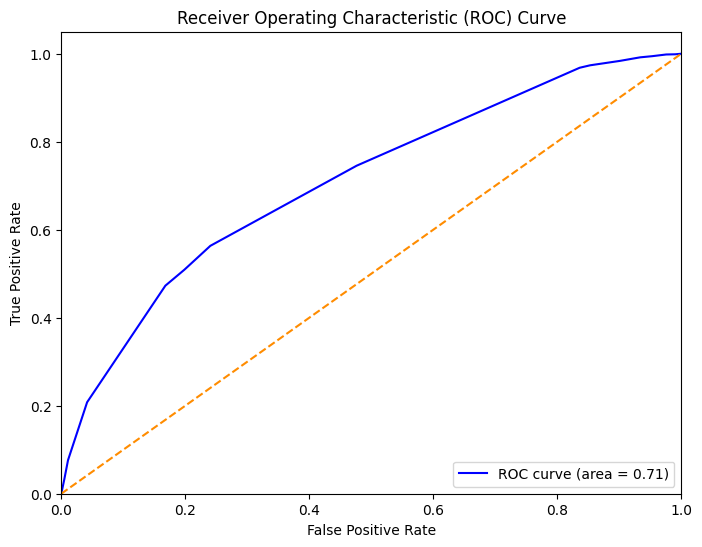

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      7440
           1       0.61      0.21      0.31      2318

    accuracy                           0.78      9758
   macro avg       0.70      0.58      0.59      9758
weighted avg       0.75      0.78      0.74      9758



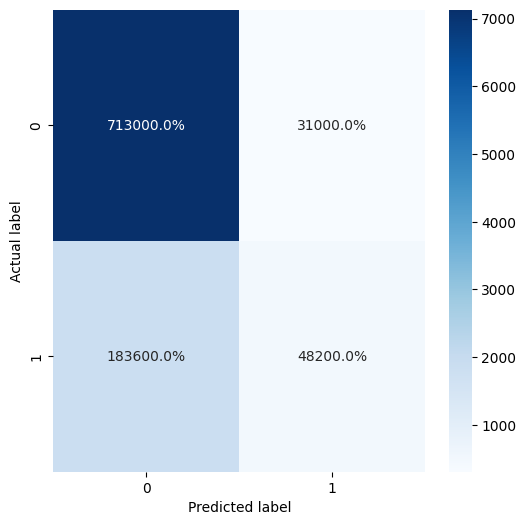

In [ ]:
Classification(GaussianNB,X_train4, X_test4, y_train4, y_test4) # the best results were found using "income > 0.15"

# Support Vector Machines Analysis

As the data is imbalanced we will use the macro avg. instead of the accuracy.



Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...............................................C=10; total time=17.6min
[CV] END ...............................................C=10; total time=18.1min
[CV] END ...............................................C=10; total time=17.0min
[CV] END ...............................................C=10; total time=19.8min
[CV] END ...............................................C=10; total time=19.4min
[CV] END ..............................................C=100; total time=20.9min
[CV] END ..............................................C=100; total time=21.4min
[CV] END ..............................................C=100; total time=22.0min
[CV] END ..............................................C=100; total time=20.8min
[CV] END ..............................................C=100; total time=18.8min
The best parameters are:  {'C': 100}
The best score associeted with the best parameters are:  0.624220552364598
The value of the a

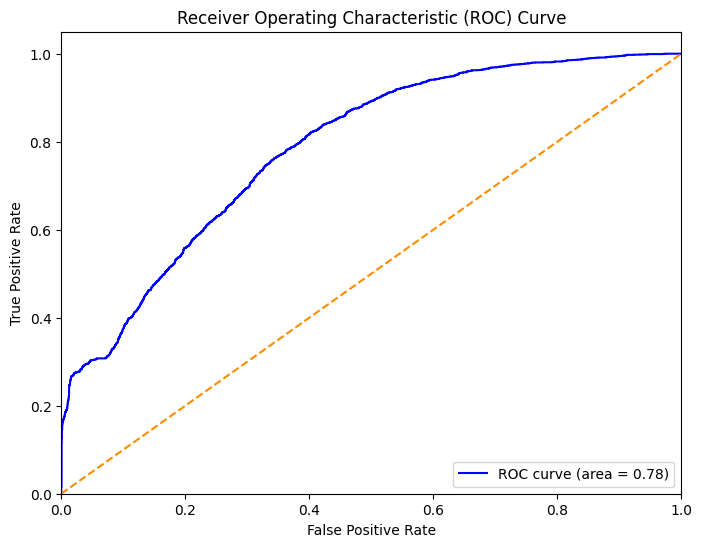

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7440
           1       0.65      0.30      0.41      2318

    accuracy                           0.80      9758
   macro avg       0.73      0.63      0.64      9758
weighted avg       0.77      0.80      0.77      9758



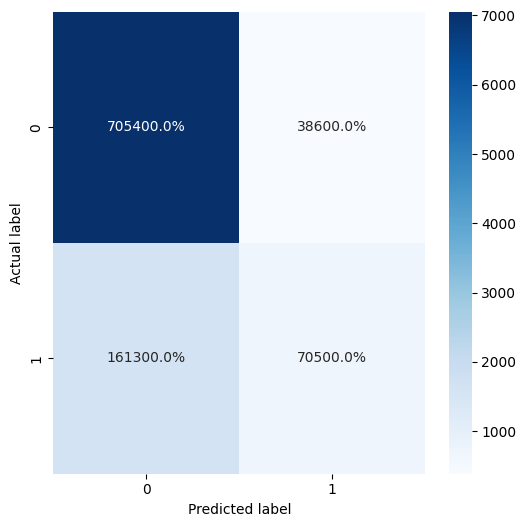

In [ ]:
Classification(SVC,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...............................................C=10; total time= 3.0min
[CV] END ...............................................C=10; total time= 3.0min
[CV] END ...............................................C=10; total time= 3.1min
[CV] END ...............................................C=10; total time= 3.0min
[CV] END ...............................................C=10; total time= 3.1min
[CV] END ..............................................C=100; total time= 4.9min
[CV] END ..............................................C=100; total time= 5.1min
[CV] END ..............................................C=100; total time= 4.8min
[CV] END ..............................................C=100; total time= 4.8min
[CV] END ..............................................C=100; total time= 5.1min
The best parameters are:  {'C': 10}
The best score associeted with the best parameters are:  0.8478428193412293
The value of the a

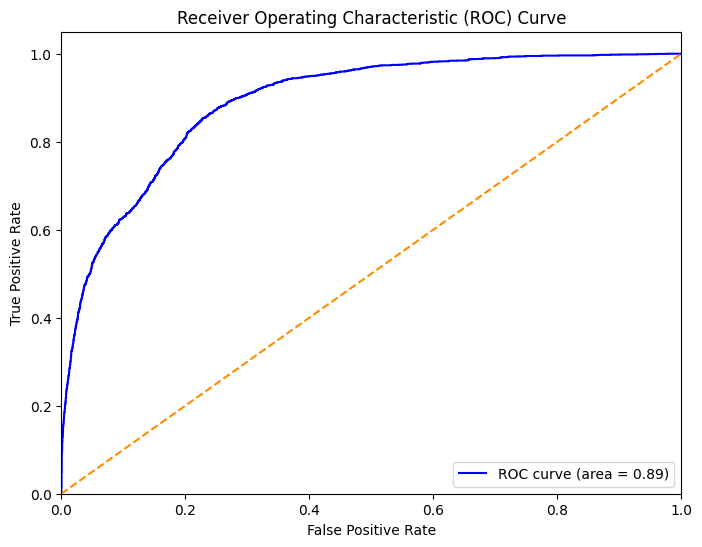

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7440
           1       0.74      0.55      0.63      2318

    accuracy                           0.85      9758
   macro avg       0.80      0.75      0.77      9758
weighted avg       0.84      0.85      0.84      9758



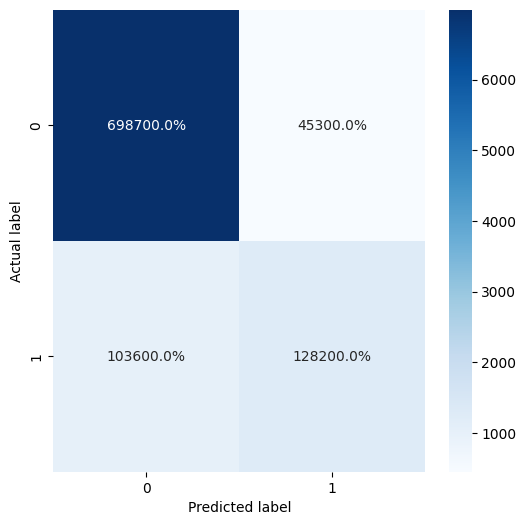

In [ ]:
Classification(SVC,X_train_mm, X_test_mm, y_train_mm, y_test_mm)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...............................................C=10; total time= 2.8min
[CV] END ...............................................C=10; total time= 2.9min
[CV] END ...............................................C=10; total time= 2.8min
[CV] END ...............................................C=10; total time= 2.8min
[CV] END ...............................................C=10; total time= 2.8min
[CV] END ..............................................C=100; total time= 2.9min
[CV] END ..............................................C=100; total time= 2.9min
[CV] END ..............................................C=100; total time= 3.0min
[CV] END ..............................................C=100; total time= 3.0min
[CV] END ..............................................C=100; total time= 3.1min
The best parameters are:  {'C': 100}
The best score associeted with the best parameters are:  0.8429749955703378
The value of the 

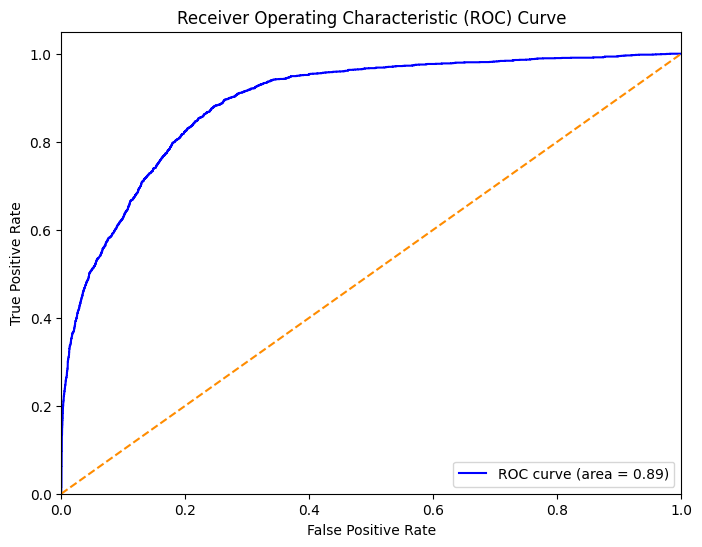

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7440
           1       0.74      0.54      0.62      2318

    accuracy                           0.84      9758
   macro avg       0.80      0.74      0.76      9758
weighted avg       0.84      0.84      0.84      9758



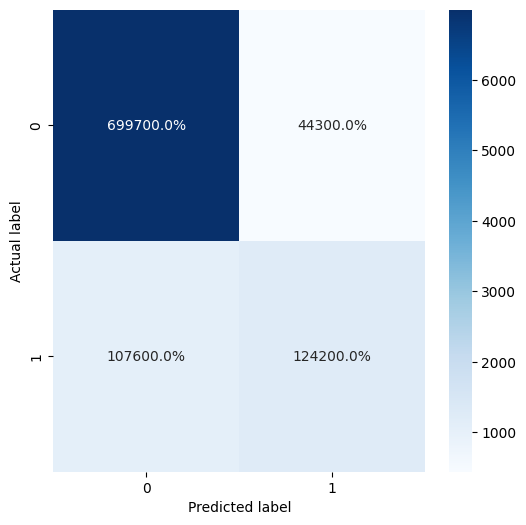

In [ ]:
Classification(SVC,X_train_log, X_test_log, y_train_log, y_test_log)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...............................................C=10; total time= 3.8min
[CV] END ...............................................C=10; total time= 3.9min
[CV] END ...............................................C=10; total time= 3.7min
[CV] END ...............................................C=10; total time= 3.8min
[CV] END ...............................................C=10; total time= 3.9min
[CV] END ..............................................C=100; total time=10.8min
[CV] END ..............................................C=100; total time=10.6min
[CV] END ..............................................C=100; total time=10.3min
[CV] END ..............................................C=100; total time=10.5min
[CV] END ..............................................C=100; total time=11.1min
The best parameters are:  {'C': 10}
The best score associeted with the best parameters are:  0.849149394922424
The value of the ar

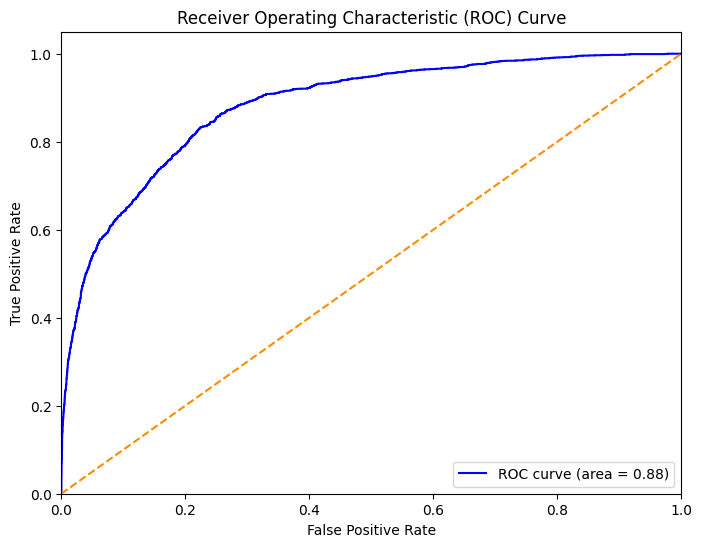

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7440
           1       0.76      0.55      0.64      2318

    accuracy                           0.85      9758
   macro avg       0.81      0.75      0.77      9758
weighted avg       0.84      0.85      0.84      9758



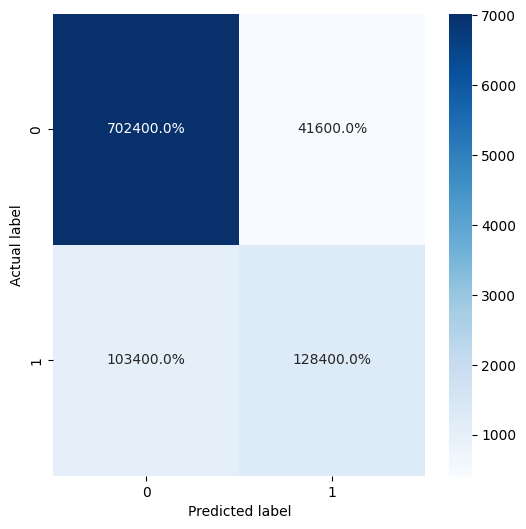

In [ ]:
Classification(SVC,X_train_std, X_test_std, y_train_std, y_test_std) # Best model

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...............................................C=10; total time= 4.2min
[CV] END ...............................................C=10; total time= 3.7min
[CV] END ...............................................C=10; total time= 3.6min
[CV] END ...............................................C=10; total time= 3.6min
[CV] END ...............................................C=10; total time= 3.5min
[CV] END ..............................................C=100; total time= 4.3min
[CV] END ..............................................C=100; total time= 4.2min
[CV] END ..............................................C=100; total time= 3.7min
[CV] END ..............................................C=100; total time= 3.6min
[CV] END ..............................................C=100; total time= 3.7min
The best parameters are:  {'C': 10}
The best score associeted with the best parameters are:  0.8127178546251006
The value of the a

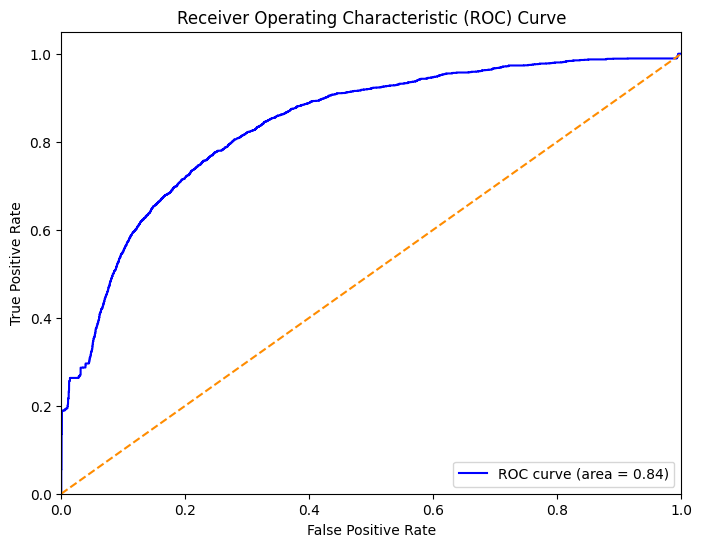

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7440
           1       0.85      0.26      0.40      2318

    accuracy                           0.81      9758
   macro avg       0.83      0.62      0.65      9758
weighted avg       0.82      0.81      0.77      9758



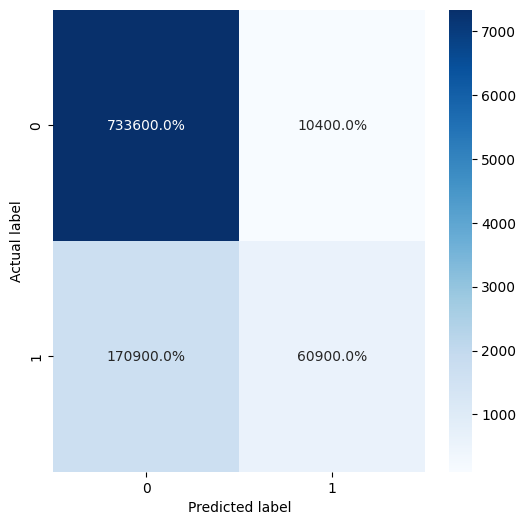

In [ ]:
Classification(SVC,X_train1, X_test1, y_train1, y_test1)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...............................................C=10; total time= 3.1min
[CV] END ...............................................C=10; total time= 3.1min
[CV] END ...............................................C=10; total time= 3.3min
[CV] END ...............................................C=10; total time= 3.3min
[CV] END ...............................................C=10; total time= 3.2min
[CV] END ..............................................C=100; total time= 3.3min
[CV] END ..............................................C=100; total time= 3.4min
[CV] END ..............................................C=100; total time= 3.4min
[CV] END ..............................................C=100; total time= 3.5min
[CV] END ..............................................C=100; total time= 3.5min
The best parameters are:  {'C': 10}
The best score associeted with the best parameters are:  0.8126922333081648
The value of the a

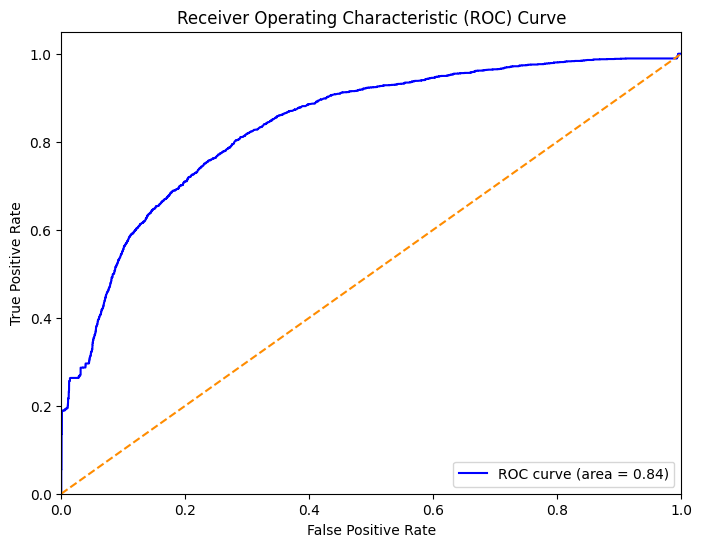

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7440
           1       0.85      0.26      0.40      2318

    accuracy                           0.81      9758
   macro avg       0.83      0.62      0.65      9758
weighted avg       0.82      0.81      0.77      9758



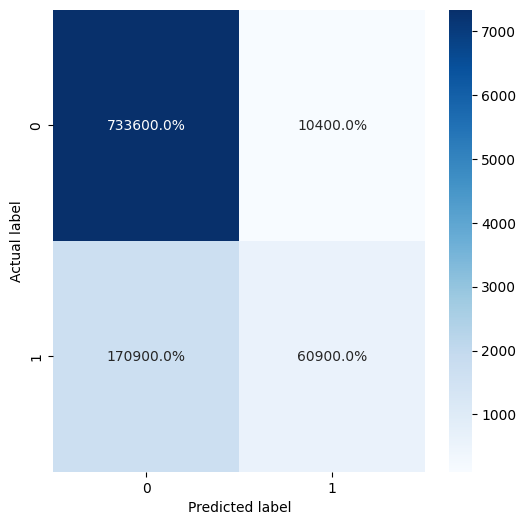

In [ ]:
Classification(SVC,X_train2, X_test2, y_train2, y_test2)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...............................................C=10; total time= 2.7min
[CV] END ...............................................C=10; total time= 2.9min
[CV] END ...............................................C=10; total time= 2.8min
[CV] END ...............................................C=10; total time= 2.8min
[CV] END ...............................................C=10; total time= 2.7min
[CV] END ..............................................C=100; total time= 3.0min
[CV] END ..............................................C=100; total time= 3.1min
[CV] END ..............................................C=100; total time= 3.1min
[CV] END ..............................................C=100; total time= 3.1min
[CV] END ..............................................C=100; total time= 3.0min
The best parameters are:  {'C': 10}
The best score associeted with the best parameters are:  0.8006251410985648
The value of the a

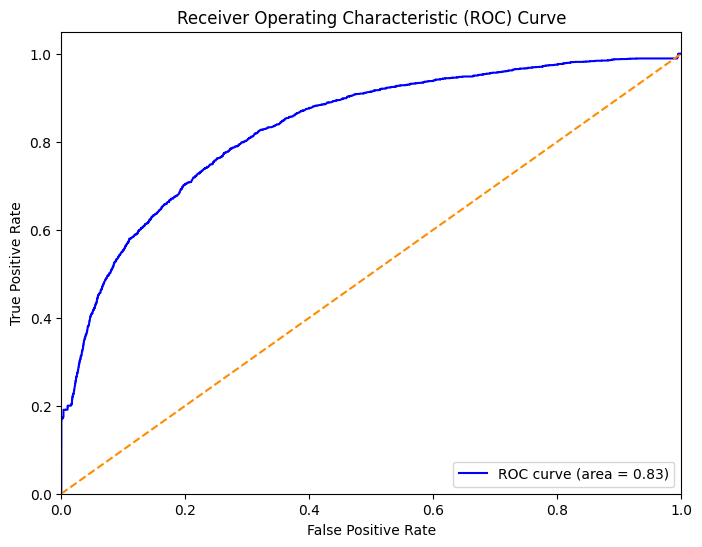

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7440
           1       0.96      0.17      0.29      2318

    accuracy                           0.80      9758
   macro avg       0.88      0.59      0.59      9758
weighted avg       0.83      0.80      0.74      9758



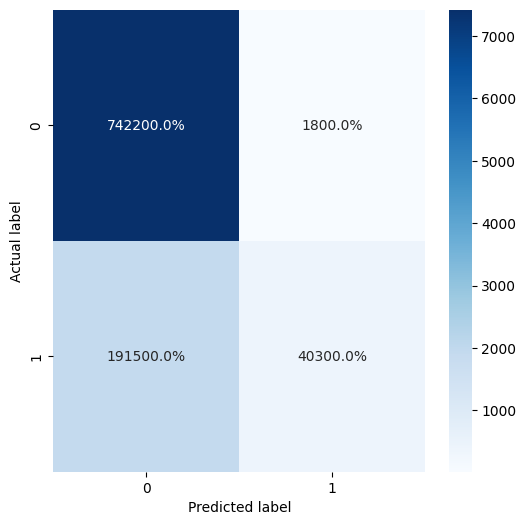

In [ ]:
Classification(SVC,X_train3, X_test3, y_train3, y_test3)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...............................................C=10; total time= 2.4min
[CV] END ...............................................C=10; total time= 2.5min
[CV] END ...............................................C=10; total time= 2.5min
[CV] END ...............................................C=10; total time= 2.5min
[CV] END ...............................................C=10; total time= 2.5min
[CV] END ..............................................C=100; total time= 3.7min
[CV] END ..............................................C=100; total time= 3.6min
[CV] END ..............................................C=100; total time= 3.5min
[CV] END ..............................................C=100; total time= 3.5min
[CV] END ..............................................C=100; total time= 3.8min
The best parameters are:  {'C': 10}
The best score associeted with the best parameters are:  0.7795397883758641
The value of the a

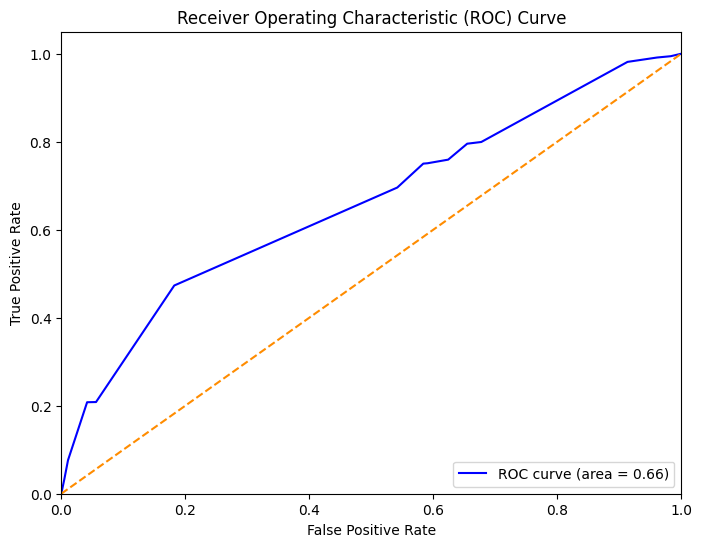

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      7440
           1       0.61      0.21      0.31      2318

    accuracy                           0.78      9758
   macro avg       0.70      0.58      0.59      9758
weighted avg       0.75      0.78      0.74      9758



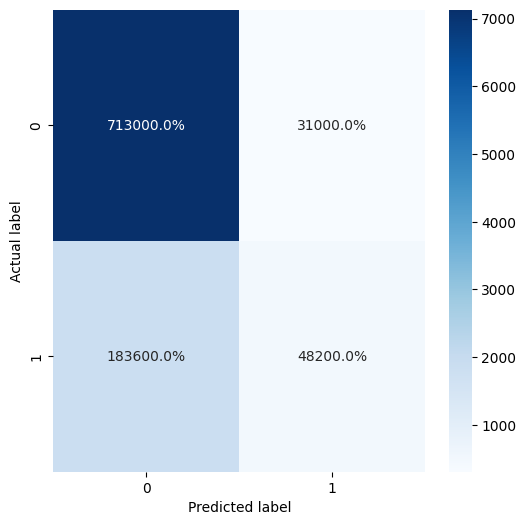

In [ ]:
Classification(SVC,X_train4, X_test4, y_train4, y_test4)

Support Vector Machines is sensitive to the scale of the input features, so it's often beneficial to scale the features

# **Results**

In [ ]:
#All confusion matrices - Logistic Regression
results = {
    "Matrix": ["Matrix 1 - No Scaler", "Matrix 2 - MinMaxScaler", "Matrix 3 - log Scaler", "Matrix 4 - StandardScaler", "Matrix 5 - 13 variables", "Matrix 6 - 9 variables", "Matrix 7 - 7 variables", "Matrix 8 - 2 variables"],
    "Class 0 Precision": [0.86, 0.84, 0.85,0.84,0.82,0.83,0.81,0.80],
    "Class 0 Recall": [0.74, 0.94, 0.94,0.94,0.95,0.95,0.96,0.96],
    "Class 0 F1-score": [0.79, 0.89, 0.89,0.89,0.88,0.88,0.88,0.87],
    "Class 1 Precision": [0.41, 0.71, 0.71,0.71,0.67,0.69,0.69,0.61],
    "Class 1 Recall": [0.60, 0.44, 0.46,0.44,0.35,0.37,0.27,0.21],
    "Class 1 F1-score": [0.49, 0.55, 0.56,0.55,0.46,0.48,0.39,0.31],
    "Accuracy": [0.70, 0.82, 0.83,0.82,0.80,0.81,0.80,0.78],
    "Macro Avg F1-score": [0.64, 0.72, 0.72,0.72,0.67,0.68,0.64,0.59]
}

# Create a DataFrame from the dictionary
df_Conf_matrix  = pd.DataFrame(results)

# Display the DataFrame
print(df_Conf_matrix )

                      Matrix  Class 0 Precision  Class 0 Recall  \
0       Matrix 1 - No Scaler               0.86            0.74   
1    Matrix 2 - MinMaxScaler               0.84            0.94   
2      Matrix 3 - log Scaler               0.85            0.94   
3  Matrix 4 - StandardScaler               0.84            0.94   
4    Matrix 5 - 13 variables               0.82            0.95   
5     Matrix 6 - 9 variables               0.83            0.95   
6     Matrix 7 - 7 variables               0.81            0.96   
7     Matrix 8 - 2 variables               0.80            0.96   

   Class 0 F1-score  Class 1 Precision  Class 1 Recall  Class 1 F1-score  \
0              0.79               0.41            0.60              0.49   
1              0.89               0.71            0.44              0.55   
2              0.89               0.71            0.46              0.56   
3              0.89               0.71            0.44              0.55   
4              0

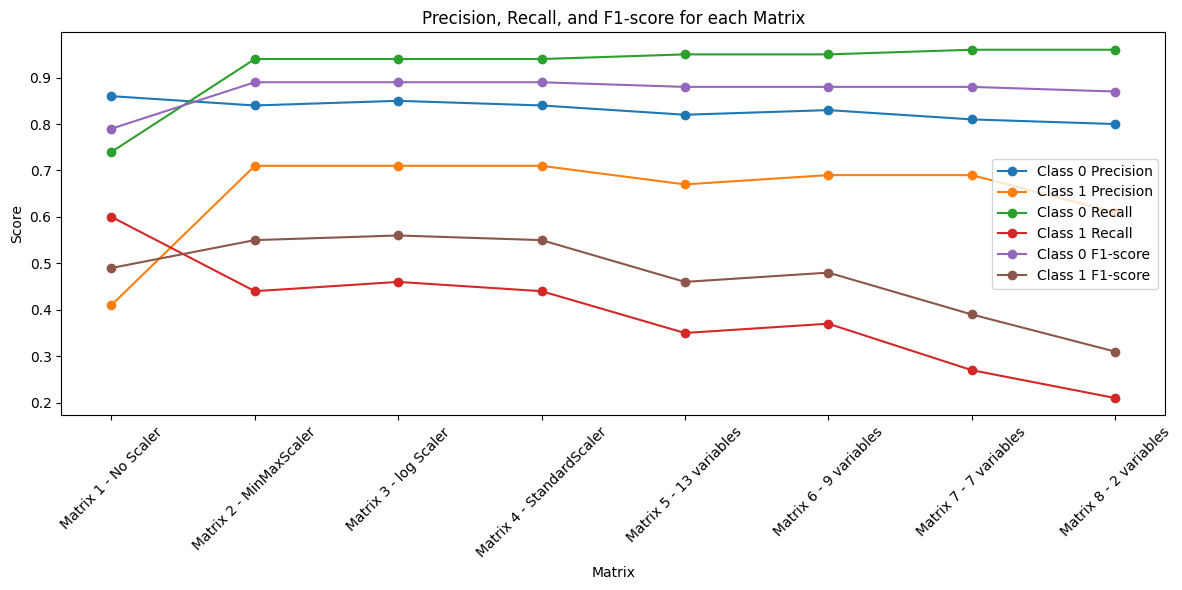

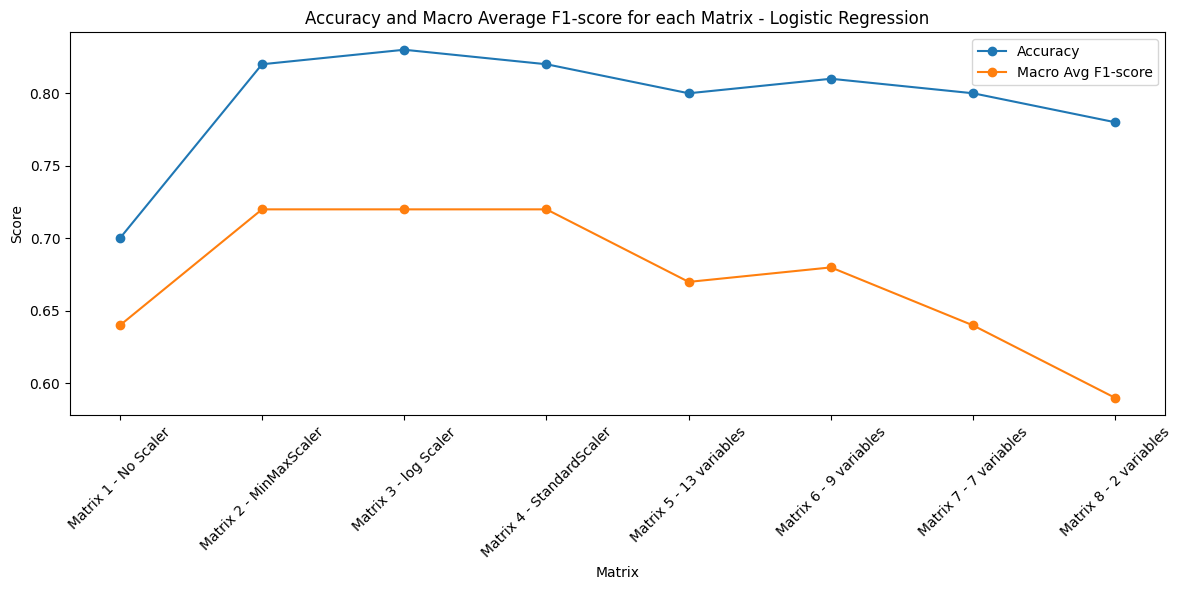

In [ ]:
# Plotting precision, recall, and F1-score for both classes - Logistic Regression
plt.figure(figsize=(12, 6))

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 0 Precision"], marker='o', label='Class 0 Precision')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 1 Precision"], marker='o', label='Class 1 Precision')

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 0 Recall"], marker='o', label='Class 0 Recall')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 1 Recall"], marker='o', label='Class 1 Recall')

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 0 F1-score"], marker='o', label='Class 0 F1-score')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 1 F1-score"], marker='o', label='Class 1 F1-score')

plt.xticks(rotation=45)
plt.title('Precision, Recall, and F1-score for each Matrix')
plt.xlabel('Matrix')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting accuracy and macro average F1-score
plt.figure(figsize=(12, 6))

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Accuracy"], marker='o', label='Accuracy')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Macro Avg F1-score"], marker='o', label='Macro Avg F1-score')

plt.xticks(rotation=45)
plt.title('Accuracy and Macro Average F1-score for each Matrix - Logistic Regression')
plt.xlabel('Matrix')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

# Organizing the results from all confusion matrices - Gaussian Naive Baye
results = {
    "Matrix": ["Matrix 1 - No Scaler", "Matrix 2 - MinMaxScaler", "Matrix 3 - log Scaler", "Matrix 4 - StandardScaler", "Matrix 5 - 13 variables", "Matrix 6 - 9 variables", "Matrix 7 - 7 variables", "Matrix 8 - 2 variables"],
    "Class 0 Precision": [0.81,0.83,0.89,0.85,0.79,0.79,0.79,0.80],
    "Class 0 Recall": [0.94,0.96,0.83,0.94,1.00,1.00,1.00,0.96],
    "Class 0 F1-score": [0.87,0.89,0.86,0.89,0.88,0.88,0.88,0.87],
    "Class 1 Precision": [0.63,0.74,0.55,0.71,0.95,0.95,0.95,0.61],
    "Class 1 Recall": [0.31,0.36,0.68,0.45,0.17,0.17,0.17,0.21],
    "Class 1 F1-score": [0.41,0.49,0.61,0.55,0.29,0.29,0.29,0.31],
    "Accuracy": [0.79,0.82,0.79,0.89,0.80,0.80,0.80,0.78],
    "Macro Avg F1-score": [0.64,0.69,0.73,0.72,0.59,0.59,0.59,0.59]
}

# Create a DataFrame from the dictionary
df_Conf_matrix  = pd.DataFrame(results)

# Display the DataFrame
print(df_Conf_matrix )

                      Matrix  Class 0 Precision  Class 0 Recall  \
0       Matrix 1 - No Scaler               0.81            0.94   
1    Matrix 2 - MinMaxScaler               0.83            0.96   
2      Matrix 3 - log Scaler               0.89            0.83   
3  Matrix 4 - StandardScaler               0.85            0.94   
4    Matrix 5 - 13 variables               0.79            1.00   
5     Matrix 6 - 9 variables               0.79            1.00   
6     Matrix 7 - 7 variables               0.79            1.00   
7     Matrix 8 - 2 variables               0.80            0.96   

   Class 0 F1-score  Class 1 Precision  Class 1 Recall  Class 1 F1-score  \
0              0.87               0.63            0.31              0.41   
1              0.89               0.74            0.36              0.49   
2              0.86               0.55            0.68              0.61   
3              0.89               0.71            0.45              0.55   
4              0

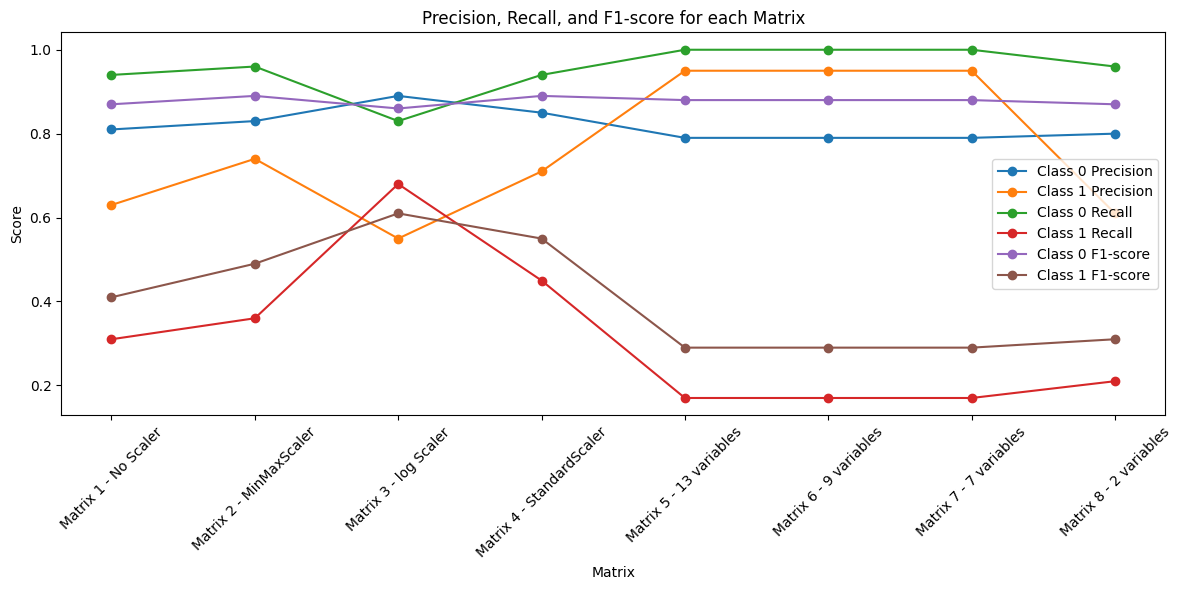

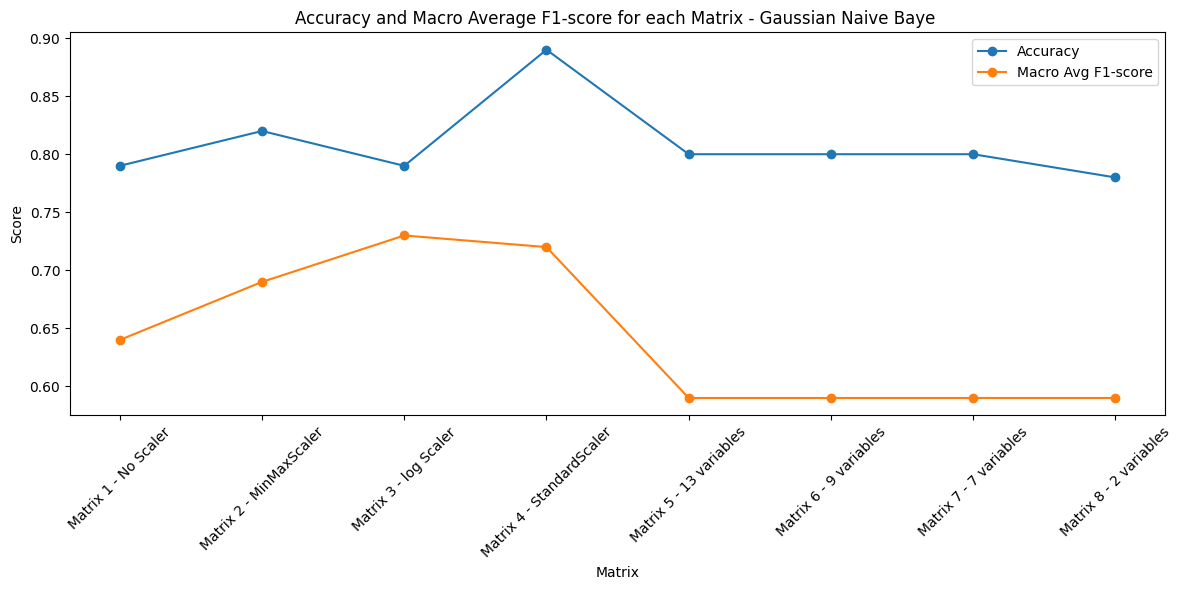

In [ ]:
# Plotting precision, recall, and F1-score for both classes
plt.figure(figsize=(12, 6))

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 0 Precision"], marker='o', label='Class 0 Precision')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 1 Precision"], marker='o', label='Class 1 Precision')

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 0 Recall"], marker='o', label='Class 0 Recall')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 1 Recall"], marker='o', label='Class 1 Recall')

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 0 F1-score"], marker='o', label='Class 0 F1-score')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 1 F1-score"], marker='o', label='Class 1 F1-score')

plt.xticks(rotation=45)
plt.title('Precision, Recall, and F1-score for each Matrix')
plt.xlabel('Matrix')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting accuracy and macro average F1-score
plt.figure(figsize=(12, 6))

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Accuracy"], marker='o', label='Accuracy')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Macro Avg F1-score"], marker='o', label='Macro Avg F1-score')

plt.xticks(rotation=45)
plt.title('Accuracy and Macro Average F1-score for each Matrix - Gaussian Naive Baye ')
plt.xlabel('Matrix')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Organizing the results from all confusion matrices - Support Vector Machine
results = {
    "Matrix": ["Matrix 1 - No Scaler", "Matrix 2 - MinMaxScaler", "Matrix 3 - log Scaler", "Matrix 4 - StandardScaler", "Matrix 5 - 13 variables", "Matrix 6 - 9 variables", "Matrix 7 - 7 variables", "Matrix 8 - 2 variables"],
    "Class 0 Precision": [0.81,0.87,0.87,0.87,0.81,0.81,0.79,0.80],
    "Class 0 Recall": [0.95,0.94,0.94,0.94,0.99,0.99,1.00,0.96],
    "Class 0 F1-score": [0.88,0.90,0.90,0.91,0.89,0.89,0.88,0.87],
    "Class 1 Precision": [0.65,0.74,0.74,0.76,0.85,0.85,0.96,0.61],
    "Class 1 Recall": [0.30,0.55,0.54,0.55,0.26,0.26,0.17,0.21],
    "Class 1 F1-score": [0.41,0.63,0.62,0.64,0.40,0.40,0.29,0.31],
    "Accuracy": [0.80,0.85,0.84,0.85,0.81,0.81,0.80,0.78],
    "Macro Avg F1-score": [0.64,0.77,0.76,0.77,0.65,0.65,0.59,0.59]
}

# Create a DataFrame from the dictionary
df_Conf_matrix  = pd.DataFrame(results)

# Display the DataFrame
print(df_Conf_matrix )

                      Matrix  Class 0 Precision  Class 0 Recall  \
0       Matrix 1 - No Scaler               0.81            0.95   
1    Matrix 2 - MinMaxScaler               0.87            0.94   
2      Matrix 3 - log Scaler               0.87            0.94   
3  Matrix 4 - StandardScaler               0.87            0.94   
4    Matrix 5 - 13 variables               0.81            0.99   
5     Matrix 6 - 9 variables               0.81            0.99   
6     Matrix 7 - 7 variables               0.79            1.00   
7     Matrix 8 - 2 variables               0.80            0.96   

   Class 0 F1-score  Class 1 Precision  Class 1 Recall  Class 1 F1-score  \
0              0.88               0.65            0.30              0.41   
1              0.90               0.74            0.55              0.63   
2              0.90               0.74            0.54              0.62   
3              0.91               0.76            0.55              0.64   
4              0

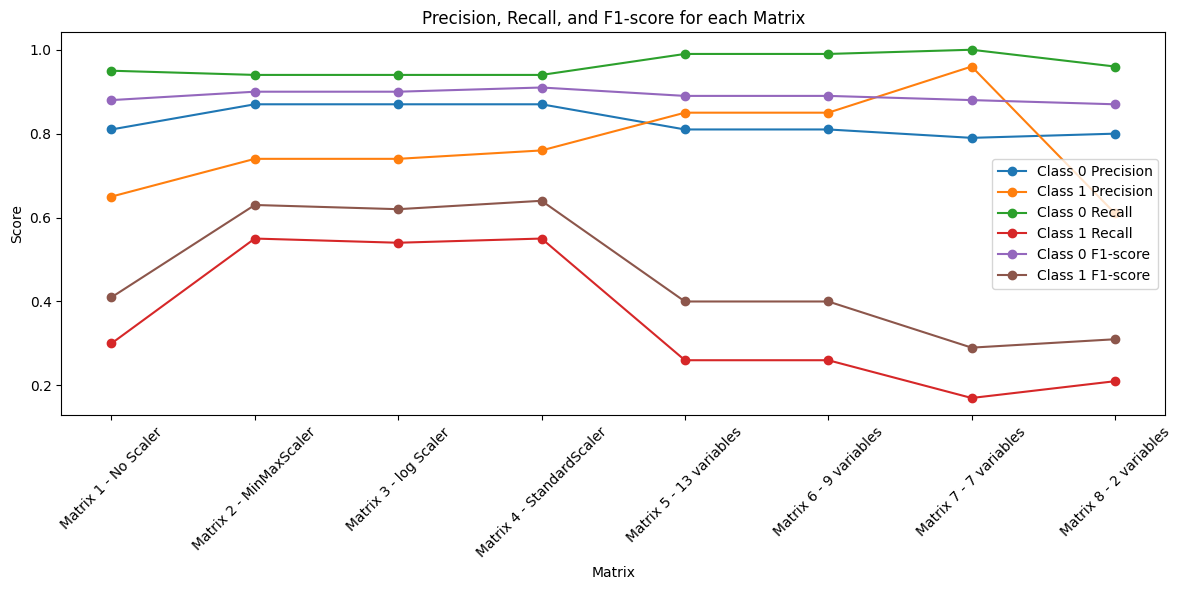

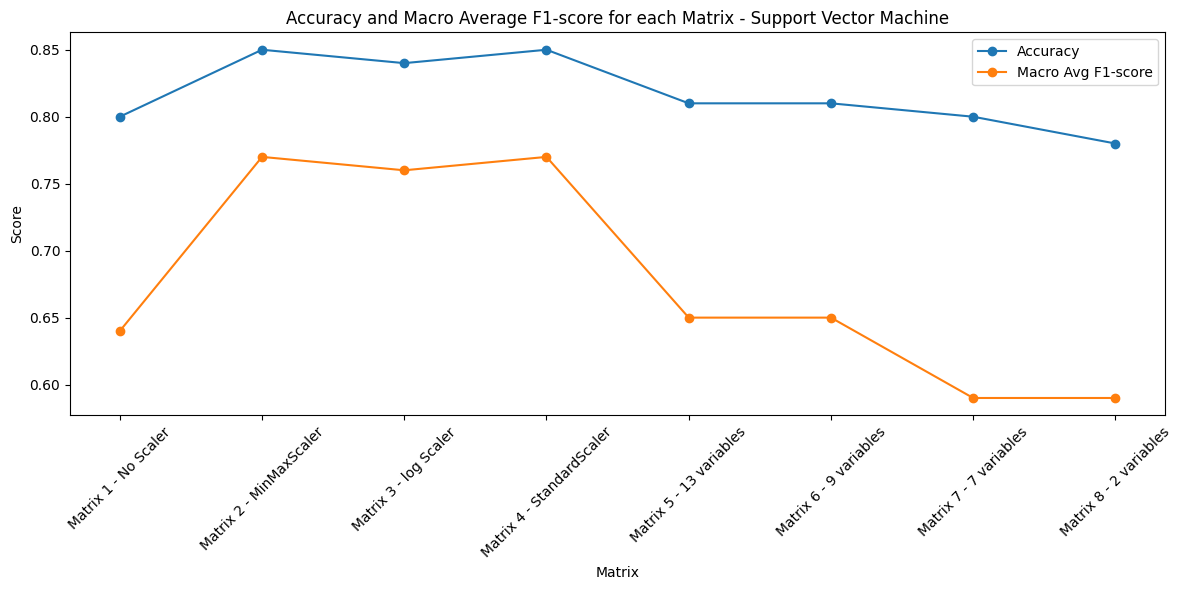

In [ ]:
# Plotting precision, recall, and F1-score for both classes
plt.figure(figsize=(12, 6))

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 0 Precision"], marker='o', label='Class 0 Precision')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 1 Precision"], marker='o', label='Class 1 Precision')

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 0 Recall"], marker='o', label='Class 0 Recall')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 1 Recall"], marker='o', label='Class 1 Recall')

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 0 F1-score"], marker='o', label='Class 0 F1-score')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Class 1 F1-score"], marker='o', label='Class 1 F1-score')

plt.xticks(rotation=45)
plt.title('Precision, Recall, and F1-score for each Matrix')
plt.xlabel('Matrix')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting accuracy and macro average F1-score
plt.figure(figsize=(12, 6))

plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Accuracy"], marker='o', label='Accuracy')
plt.plot(df_Conf_matrix ["Matrix"], df_Conf_matrix ["Macro Avg F1-score"], marker='o', label='Macro Avg F1-score')

plt.xticks(rotation=45)
plt.title('Accuracy and Macro Average F1-score for each Matrix - Support Vector Machine')
plt.xlabel('Matrix')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

# SAMPLING

**SMOTE SAMPLING**

In [ ]:
print(y_train.value_counts())
sm = SMOTE()

X_smote, y_smote = sm.fit_resample(X_train, y_train)
print(y_smote.value_counts())


In [ ]:
Classification(LogisticRegression,X_smote, X_test, y_smote, y_test)

**RANDOM UNDERSAMPLING**

In [ ]:
# Apply random under-sampling
#print(y_train.value_counts())
#rundersampled = RandomUnderSampler()


#X_rundersampled, y_rundersampled = rundersampled.fit_resample(X_train, y_train)
#print(y_rundersampled.value_counts())



**Randon Oversampling**

In [ ]:
# Apply random under-sampling
#print(y_train.value_counts())
#roversampled = RandomOverSampler()


#X_roversampled, y_roversampled = roversampled.fit_resample(X_train, y_train)
#print(y_roversampled.value_counts())

# **References:**

[1] Scikit learn: https://scikit-learn.org/stable/supervised_learning.html

[2] Stackoverflow: https://stackoverflow.com/

[3] Kaggle: https://www.kaggle.com/

[4] Lecture Notes: https://study.dbs.ie/2122/msc-data/B9DA109/u1/index.html#/lessons/9fmrZ-qg71_3OaWCja5sPXXw1Skaa2kJ

https://study.dbs.ie/2122/msc-data/B9DA109/u1/index.html#/ https://study.dbs.ie/2122/msc-data/B9DA109/u2/index.html#/lessons/581oVBQjVCpps7kTvW9zYulimrk1SOdz

[5] Analytics Vidhya: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp drive/MyDrive/CA_B9DA109.ipynb ./

In [ ]:
!jupyter nbconvert --to PDF "CA_B9DA109.ipynb"


[NbConvertApp] Converting notebook CA_B9DA109.ipynb to PDF
[NbConvertApp] Support files will be in CA_B9DA109_files/
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] Making directory ./CA_B9DA109_files
[NbConvertApp] M